<a href="https://colab.research.google.com/github/patrick-seib/cmpt-353/blob/master/416_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statistics
import statsmodels
from google.colab import drive
from matplotlib import pyplot as plt

drive.mount('/content/drive/')
xls = pd.ExcelFile('/content/drive/My Drive/416_Data/BTC-USD.xlsx')
df_total = pd.read_excel(xls)

df_risk_free = pd.read_excel(xls, '3 month T-Bill')
df_bitcoin = pd.read_excel(xls, 'BTC-USD')

Mounted at /content/drive/


In [26]:
bit_list = df_bitcoin.Price.to_list()
bit_daily_mean = statistics.mean(bit_list)
bit_std = statistics.stdev(bit_list)

print(bit_daily_mean)
print(bit_std)

11116.655988540984
4305.839838456107


In [27]:
import math

def daily_variance(series, decay):
  N = len(series)
  variance = 0
  t = 1
  for item in range(N):
    r_t = math.log(series[item]) - math.log(series[item-1])
    variance += ((1 - decay)/(1- decay**N))*(decay**(N-t)*r_t**2)
    t = t+1
  return variance

Text(0.5, 1.0, 'Bitcoin Return Over Time')

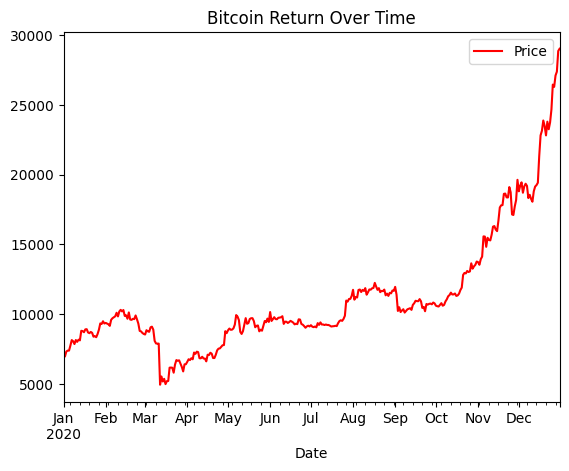

In [28]:
ax = plt.gca()
df_bitcoin.plot(kind='line', x='Date', y='Price', color='red', ax=ax)
plt.title('Bitcoin Return Over Time')

Finding daily variance

In [29]:
print(daily_variance(bit_list, 0.94))

0.0013105935297164095


Now getting the 3 month-rate and converting it to annual

In [20]:
def three_month_rate(series, starting_index):
  rate = 0
  for item in range(62):
    rate += series[item + starting_index]
  rate = rate / 62
  return rate

rate_list = df_risk_free.Rate.to_list()

r1 = three_month_rate(rate_list, 0)
r2 = three_month_rate(rate_list, 62)
r3 = three_month_rate(rate_list, 124)
r4 = three_month_rate(rate_list, 186)

print(r1)
print(r2)
print(r3)
print(r4)

annual_rate = (r1+r2+r3+r4) / 4
print(annual_rate)

1.1040322580645163
0.1419354838709678
0.11483870967741937
0.09338709677419353
0.36354838709677423


In [7]:
!pip install option-price

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Binomial Tree option Pricing

In [25]:
from optionprice import Option

bitcoin_option = Option(european=True, kind='call', s0=29374, k=28000, r=annual_rate, sigma=bit_std, t='365')
bitcoin_option.getPrice(method="BT")

/usr/local/lib/python3.9/dist-packages/optionprice/option.py:85: RuntimeWarning: overflow encountered in power
  np.power(u,tree[:iteration//2],out=tree[:iteration//2])
/usr/local/lib/python3.9/dist-packages/optionprice/option.py:87: RuntimeWarning: overflow encountered in multiply
  np.maximum((self.s0 * tree - self.k) * self.kind,0,out=tree)


inf

Now the Black-Scholes Method

In [24]:
bitcoin_option.getPrice(method="BSM")

29374.0